In [1]:
import pandas as pd
import janitor
import datetime

from IPython.display import display, HTML
from pyvis import network as net
import networkx as nx
try:
    df_ori = pd.read_csv("C://users/cstan/Documents/CooperStandard/tutorials/graphs/Connections.csv", skiprows=2)
except Exception as e:
    print(f"Error opening file {e}\n")
print(df_ori.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     1372 non-null   object
 1   Last Name      1372 non-null   object
 2   Email Address  17 non-null     object
 3   Company        1344 non-null   object
 4   Position       1350 non-null   object
 5   Connected On   1402 non-null   object
dtypes: object(6)
memory usage: 65.8+ KB
None


In [2]:

df = (
    df_ori
    .clean_names() # remove spacing and capitalization
    .drop(columns=['first_name', 'last_name', 'email_address']) # drop for privacy
    .dropna(subset=['company', 'position']) # drop missing values in company and position
    .to_datetime('connected_on', format='%d %b %Y')
  )
print(df.head())

                           company  \
0                          Arcadis   
1                          Peraton   
2  Universidad Pontificia Comillas   
3                     Peraton Labs   
4                          Peraton   

                                     position connected_on  
0    Principal Consultant - Business Advisory   2023-02-25  
1  Business Development Director - USAF Cyber   2023-01-24  
2           Assistant Collaborating Professor   2023-01-21  
3     Senior Director of Business Development   2023-01-15  
4           VP, Cyber and Information Warfare   2022-12-09  


                         company  count
0               Northrop Grumman     99
1                        Peraton     34
2   Northrop Grumman Corporation     26
3                 DataPath, Inc.     14
4           Numerica Corporation     12
5      Amazon Web Services (AWS)     12
6              Collins Aerospace     10
7                Lockheed Martin      8
8  Raytheon Intelligence & Space      7
9                     CodeMettle      6


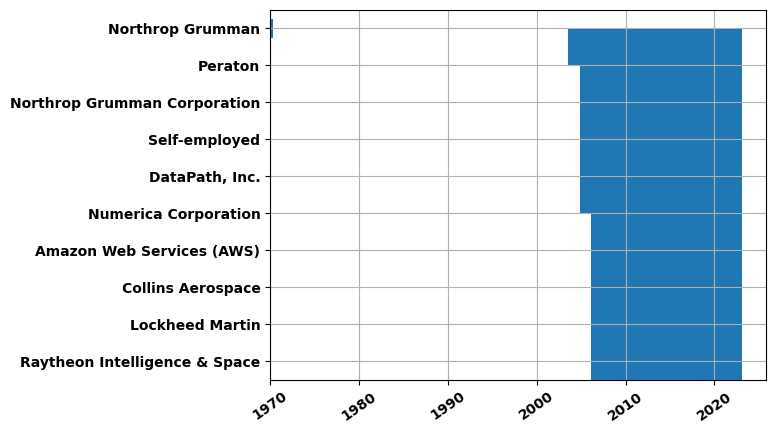

In [3]:
df['company'].value_counts().head(10).plot(kind="barh").invert_yaxis()

pattern = "freelance|self-employed"
df = df[~df['company'].str.contains(pattern, case=False)]

'''
Using value_counts()again, along with sort_values(), we’re able to get a new dataframe of the companies along with the counts.

We do the same process for the position column.

Now we have our data frame, it’s time to create our network.

'''
df['connected_on'].hist(xrot=35, bins=15)

df_company = df['company'].value_counts().reset_index()
df_company.columns = ['company', 'count']
df_company = df_company.sort_values(by="count", ascending=False)
print(df_company.head(10))

In [4]:

df_position = df['position'].value_counts().reset_index()
df_position.columns = ['position', 'count']
df_position = df_position.sort_values(by="count", ascending=False)
print(df_position.head(10))


                   position  count
0                 President     22
1           Program Manager     16
2                   Retired     15
3  Senior Software Engineer     15
4                   Partner     13
5                     Owner     13
6                       CEO     12
7                  Director     11
8   Chief Executive Officer     10
9          Systems Engineer      9


In [5]:
nt = net.Network(notebook=True)

g = nx.Graph()
g.add_node(0, label = "root") # intialize yourself as central node
g.add_node(1, label = "Company 1", size=10, title="info1")
g.add_node(2, label = "Company 2", size=40, title="info2")
g.add_node(3, label = "Company 3", size=60, title="info3")
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(0, 3)

nt.from_nx(g)
nt.show('nodes.html')
display(HTML('nodes.html'))

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [6]:

print(f"number of nodes: {g.number_of_nodes()}")
print(f"number of edges: {g.number_of_edges()}")


number of nodes: 4
number of edges: 3


In [7]:
for _, row in df_company.head(5).iterrows():
  print(row['company'] + "-" + str(row['count']))

print(df_company.shape)
df_company_reduced = df_company.loc[df_company['count']>=5]
print(df_company_reduced.shape)


Northrop Grumman-99
Peraton-34
Northrop Grumman Corporation-26
DataPath, Inc.-14
Numerica Corporation-12
(976, 2)
(18, 2)


In [8]:

print(df_position.shape)
df_position_reduced = df_position.loc[df_position['count']>=5]
print(df_position_reduced.shape)


(1022, 2)
(26, 2)


In [9]:
# initialize graph
g = nx.Graph()
g.add_node('root') # intialize yourself as central

# use iterrows tp iterate through the data frame
for _, row in df_company_reduced.iterrows():

  # store company name and count
  company = row['company']
  count = row['count']

  title = f"{company} – {count}"
  positions = set([x for x in df[company == df['company']]['position']])
  positions = ''.join('{}'.format(x) for x in positions)

  position_list = f"{positions}"
  hover_info = title + position_list

  g.add_node(company, size=count*2, title=hover_info, color='#3449eb')
  g.add_edge('root', company, color='grey')

In [10]:

# generate the graph
nt = net.Network(height='700px', width='700px', bgcolor="black", font_color='white')
nt.from_nx(g)
nt.hrepulsion()
# more customization https://tinyurl.com/yf5lvvdm
nt.show('company_graph.html')
display(HTML('company_graph.html'))


In [11]:


# initialize graph
g = nx.Graph()
g.add_node('root') # intialize yourself as central

# use iterrows tp iterate through the data frame
for _, row in df_position_reduced.iterrows():

  count = f"{row['count']}"
  position= row['position']

  g.add_node(position, size=count, color='#3449eb', title=count)
  g.add_edge('root', position, color='grey')

In [12]:


# generate the graph
nt = net.Network(height='700px', width='700px', bgcolor="black", font_color='white')
nt.from_nx(g)
nt.hrepulsion()
# more customization https://tinyurl.com/yf5lvvdm
nt.show('position_graph.html')
display(HTML('position_graph.html'))

